In [0]:
import numpy as np
import pandas as pd
import cv2
import PIL.Image
import io
from zipfile import ZipFile
from urllib.request import urlopen
import os
from tqdm import tqdm

# **Loading the data images**

In [0]:
url = 'http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip'

In [0]:
resp = urlopen(url)
zipfile = ZipFile(io.BytesIO(resp.read()))
zipfile.namelist()

In [0]:
zipfile.extractall('/content/')

# **Preparing the data**

# 2.1) Making the functions to get the training and validation set from the Images

In [0]:
X=[]
Z=[]
IMG_SIZE=150
AGRICULTURAL_DIR='/content/UCMerced_LandUse/Images/agricultural' 
AIRPLANE_DIR='/content/UCMerced_LandUse/Images/airplane'
BASEBALLDIAMOND_DIR='/content/UCMerced_LandUse/Images/baseballdiamond'
BEACH_DIR='/content/UCMerced_LandUse/Images/beach'
BUILDINGS_DIR='/content/UCMerced_LandUse/Images/buildings'
CHAPARRAL_DIR='/content/UCMerced_LandUse/Images/chaparral'
DENSERESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/denseresidential'
FOREST_DIR='/content/UCMerced_LandUse/Images/forest'
FREEWAY_DIR='/content/UCMerced_LandUse/Images/freeway'
GOLFCOURSE_DIR='/content/UCMerced_LandUse/Images/golfcourse'
HARBOR_DIR='/content/UCMerced_LandUse/Images/harbor'
INTERSECTION_DIR='/content/UCMerced_LandUse/Images/intersection'
MEDIUMRESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/mediumresidential'
MOBILEHOMEPARK_DIR='/content/UCMerced_LandUse/Images/mobilehomepark'
OVERPASS_DIR='/content/UCMerced_LandUse/Images/overpass'
PARKINGLOT_DIR='/content/UCMerced_LandUse/Images/parkinglot'
RIVER_DIR='/content/UCMerced_LandUse/Images/river'
RUNWAY_DIR='/content/UCMerced_LandUse/Images/runway'
SPARSERESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/sparseresidential'
STORAGETANKS_DIR='/content/UCMerced_LandUse/Images/storagetanks'
TENNISCOURT_DIR='/content/UCMerced_LandUse/Images/tenniscourt'

In [0]:
def assign_label(img,image_type):
    return image_type

In [0]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [24]:
make_train_data('Agricultural',AGRICULTURAL_DIR)
make_train_data('Airplane',AIRPLANE_DIR)
make_train_data('Baseball Diamond',BASEBALLDIAMOND_DIR)
make_train_data('Beach',BEACH_DIR)
make_train_data('Buildings',BUILDINGS_DIR)
make_train_data('Chaparral',CHAPARRAL_DIR)
make_train_data('Dense Residential',DENSERESIDENTIAL_DIR)
make_train_data('Forest',FOREST_DIR)
make_train_data('Freeway',FREEWAY_DIR)
make_train_data('Golfcourse',GOLFCOURSE_DIR)
make_train_data('Harbor',HARBOR_DIR)
make_train_data('Intersection',INTERSECTION_DIR)
make_train_data('Medium Residential',MEDIUMRESIDENTIAL_DIR)
make_train_data('Mobile Home Park',MOBILEHOMEPARK_DIR)
make_train_data('Overpass',OVERPASS_DIR)
make_train_data('Parking Lot',PARKINGLOT_DIR)
make_train_data('River',RIVER_DIR)
make_train_data('Runway',RUNWAY_DIR)
make_train_data('Sparse Residential',SPARSERESIDENTIAL_DIR)
make_train_data('Storage Tanks',STORAGETANKS_DIR)
make_train_data('Tennis Court',TENNISCOURT_DIR)

100%|██████████| 100/100 [00:00<00:00, 1683.82it/s]


# **Importing various modules**

In [25]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


# 2.2 ) Label Encoding the Y array (i.e. agricultural->0, airplane->1 etc...) & then One Hot Encoding

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

# 2.3) Splitting into Training and Validation Sets

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# 2.4 ) Setting the Random Seeds

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

# **3 ) Modelling**

# 3.1 ) Building the ConvNet Model

In [29]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

# 3.2 ) Using a LR Annealer

In [0]:
batch_size=21
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# 3.3 ) Data Augmentation to prevent Overfitting


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# 3.4 ) Compiling the Keras Model & Summary

In [32]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

# 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [34]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))




Epoch 1/50





78/78 [==============================] - 23s 293ms/step - loss: 0.1872 - acc: 0.9522 - val_loss: 0.1797 - val_acc: 0.9524
Epoch 2/50
78/78 [==============================] - 9s 117ms/step - loss: 0.1687 - acc: 0.9525 - val_loss: 0.1545 - val_acc: 0.9532
Epoch 3/50
78/78 [==============================] - 9s 116ms/step - loss: 0.1461 - acc: 0.9549 - val_loss: 0.1433 - val_acc: 0.9539
Epoch 4/50
78/78 [==============================] - 9s 115ms/step - loss: 0.1303 - acc: 0.9579 - val_loss: 0.1117 - val_acc: 0.9610
Epoch 5/50
78/78 [==============================] - 9s 115ms/step - loss: 0.1151 - acc: 0.9606 - val_loss: 0.0985 - val_acc: 0.9646
Epoch 6/50
78/78 [==============================] - 9s 116ms/step - loss: 0.1017 - acc: 0.9643 - val_loss: 0.0952 - val_acc: 0.9668
Epoch 7/50
78/78 [==============================] - 9s 119ms/step - loss: 0.0953 - acc: 0.9652 - val_loss: 0.0937 - val_acc: 0.9644
Epoch 8/50
78/78 [==============================] - 9s 119ms/step -

# 4 ) Evaluating the Model Performance

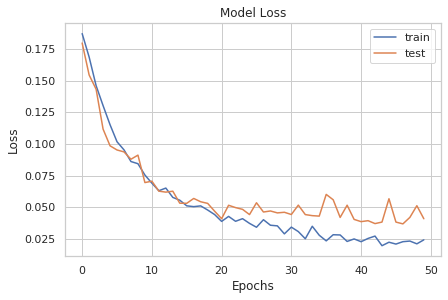

In [35]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

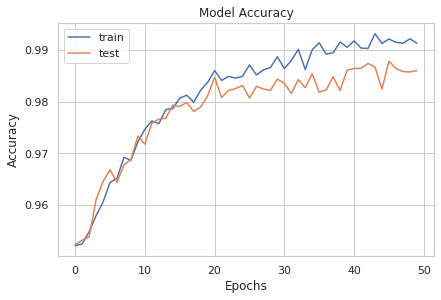

In [36]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


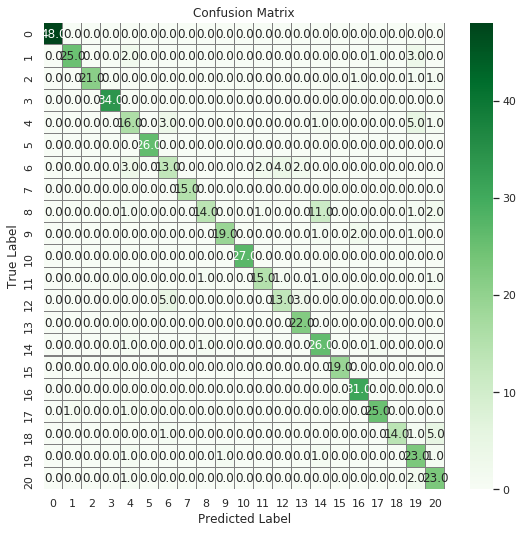

In [37]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()